# 1.4.10

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
img = cv2.imread('beach-438500_1280.jpg',0)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [14]:
hist.size

256

In [15]:
#hist

array([[1.2100e+02],
       [7.1000e+01],
       [1.0200e+02],
       [1.2700e+02],
       [2.0000e+02],
       [2.9800e+02],
       [4.4900e+02],
       [5.4800e+02],
       [7.5000e+02],
       [8.5400e+02],
       [1.0480e+03],
       [1.0650e+03],
       [1.2680e+03],
       [1.2560e+03],
       [1.2890e+03],
       [1.4950e+03],
       [1.5010e+03],
       [1.6420e+03],
       [1.8540e+03],
       [1.9560e+03],
       [2.0910e+03],
       [2.3690e+03],
       [2.5540e+03],
       [2.7790e+03],
       [3.1710e+03],
       [3.3350e+03],
       [3.6900e+03],
       [4.1120e+03],
       [4.3580e+03],
       [4.7750e+03],
       [5.1630e+03],
       [5.6630e+03],
       [6.2140e+03],
       [6.6640e+03],
       [6.9730e+03],
       [7.3260e+03],
       [7.6190e+03],
       [7.5070e+03],
       [7.8810e+03],
       [8.0220e+03],
       [8.3600e+03],
       [8.1590e+03],
       [8.1020e+03],
       [7.8800e+03],
       [7.4480e+03],
       [7.3440e+03],
       [7.0200e+03],
       [6.572

In [16]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

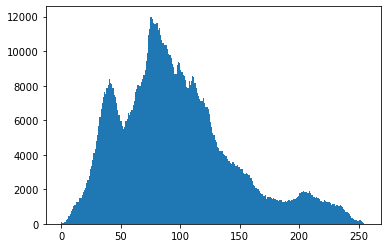

In [17]:
img = cv2.imread('beach-438500_1280.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

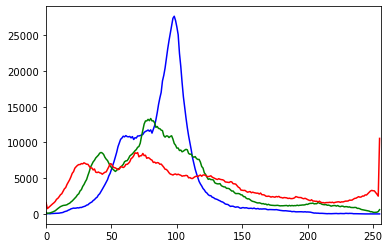

In [20]:
img = cv2.imread('beach-438500_1280.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [21]:
img.shape

(853, 1280, 3)

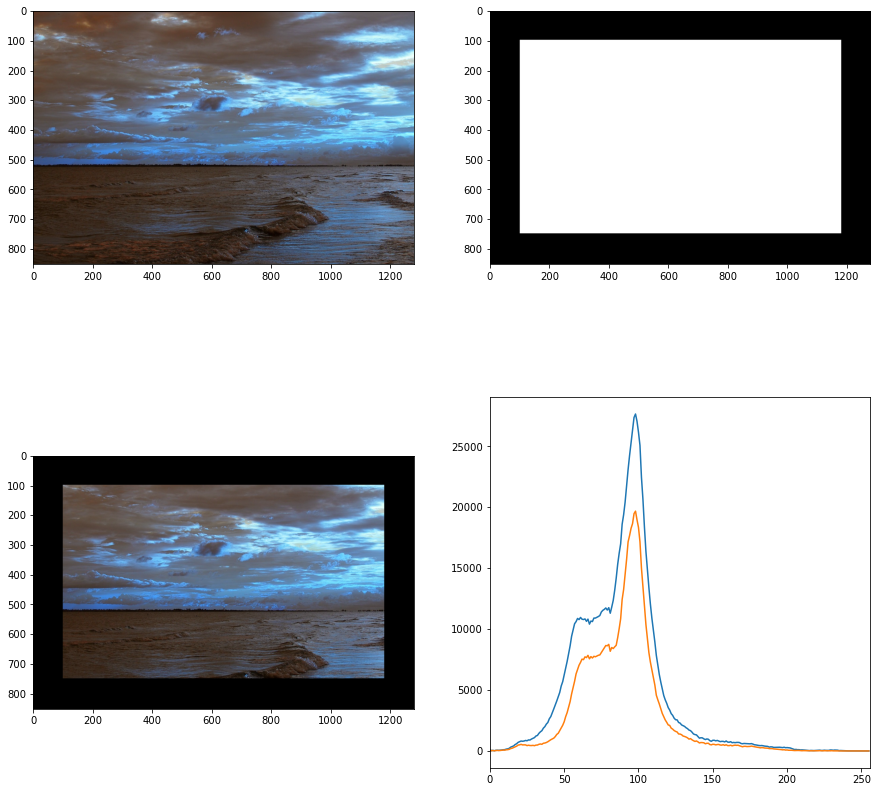

In [22]:
# create size
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:750, 100:1180] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


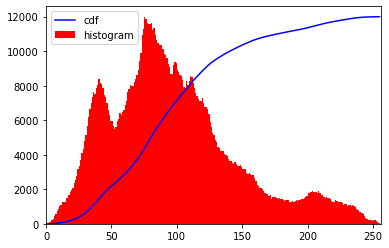

In [23]:
img = cv2.imread('beach-438500_1280.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [24]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [25]:
img2 = cdf[img]

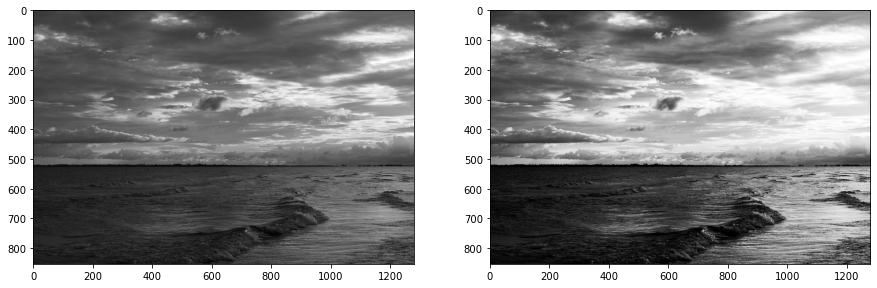

In [26]:
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2,'gray')
plt.show()

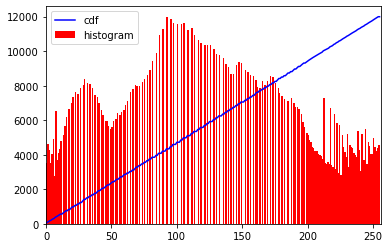

In [30]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

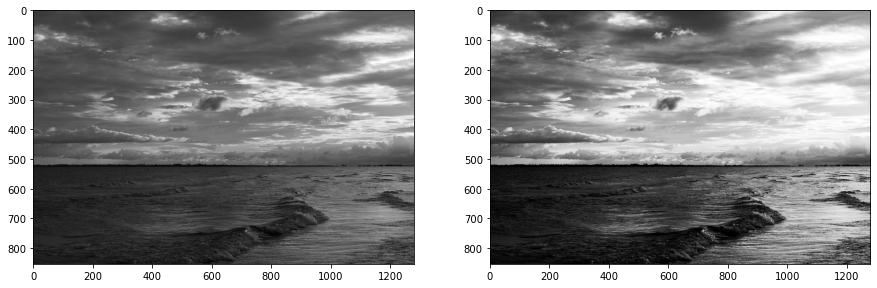

In [33]:
img = cv2.imread('beach-438500_1280.jpg',0)
equ = cv2.equalizeHist(img)
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2,'gray')
plt.show()

In [37]:
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()